In [1]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
import mutable_prov

# Mutable-PROV

## Names, literals, and constants

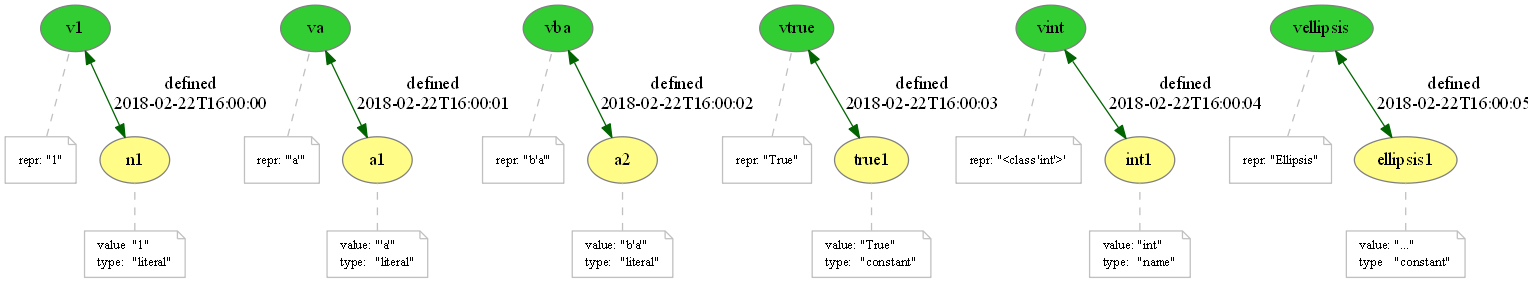

In [2]:
%%provn -o ../mutable_prov/names -e png svg pdf provn
entity(n1, [value="1", type="literal"])
value(v1, [repr="1"])
defined(n1, v1, 2018-02-22T16:00:00)

entity(a1, [value="'a'", type="literal"])
value(va, [repr="'a'"])
defined(a1, va, 2018-02-22T16:00:01)

entity(a2, [value="b'a'", type="literal"])
value(vba, [repr="b'a'"])
defined(a2, vba, 2018-02-22T16:00:02)

entity(true1, [value="True", type="constant"])
value(vtrue, [repr="True"])
defined(true1, vtrue, 2018-02-22T16:00:03)

entity(int1, [value="int", type="name"])
value(vint, [repr="<class 'int'>"])
defined(int1, vint, 2018-02-22T16:00:04)

entity(ellipsis1, [value="...", type="constant"])
value(vellipsis, [repr="Ellipsis"])
defined(ellipsis1, vellipsis, 2018-02-22T16:00:05)

## Assignment

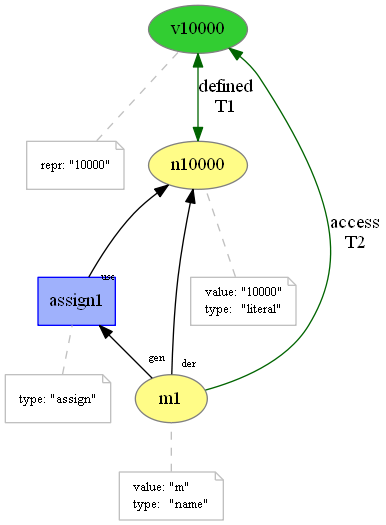

In [3]:
%%provn -o ../mutable_prov/assign -e png svg pdf provn
entity(n10000, [value="10000", type="literal"])
value(v10000, [repr="10000"])
defined(n10000, v10000, T1)

entity(m1, [value="m", type="name"])
accessed(m1, v10000, T2)

activity(assign1, [type="assign"])
used(u1; assign1, n10000, -)
wasGeneratedBy(g1; m1, assign1, -)
wasDerivedFrom(m1, n10000, assign1, g1, u1)

## Operation

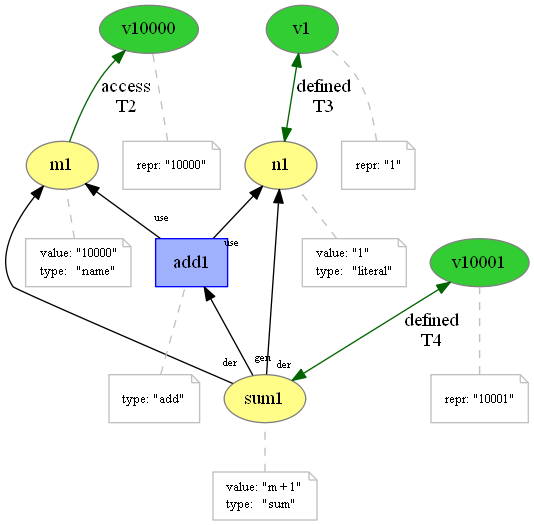

In [4]:
%%provn -o ../mutable_prov/operation -e png svg pdf provn
entity(m1, [value="10000", type="name"])
value(v10000, [repr="10000"])
accessed(m1, v10000, T2)
entity(n1, [value="1", type="literal"])
value(v1, [repr="1"])
defined(n1, v1, T3)
entity(sum1, [value="m + 1", type="sum"])
value(v10001, [repr="10001"])
defined(sum1, v10001, T4)

activity(add1, [type="add"])
used(u2; add1, m1, -)
used(u3; add1, n1, -)
wasGeneratedBy(g2; sum1, add1, -)
wasDerivedFrom(sum1, m1, add1, g2, u2)
wasDerivedFrom(sum1, n1, add1, g3, u3)

## List definition

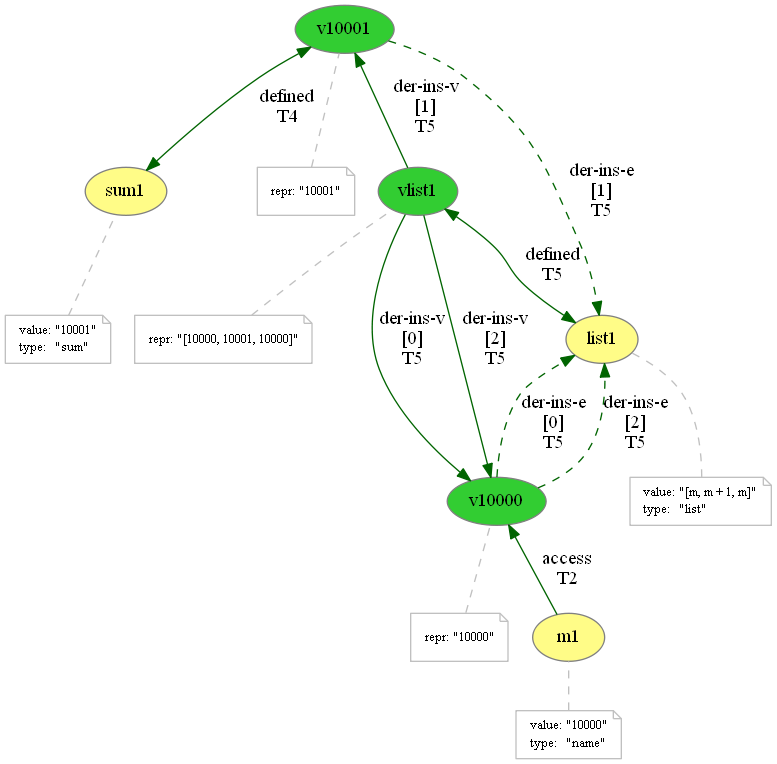

In [5]:
%%provn -o ../mutable_prov/list -e png svg pdf provn
entity(m1, [value="10000", type="name"])
value(v10000, [repr="10000"])
accessed(m1, v10000, T2)

entity(sum1, [value="10001", type="sum"])
value(v10001, [repr="10001"])
defined(sum1, v10001, T4)

entity(list1, [value="[m, m + 1, m]", type="list"])
value(vlist1, [repr="[10000, 10001, 10000]"])
derivedByInsertion(
    list1, vlist1,
    {("0", v10000), ("1", v10001), ("2", v10000)},
    T5
)
defined(list1, vlist1, T5)

## Assignment of list definition

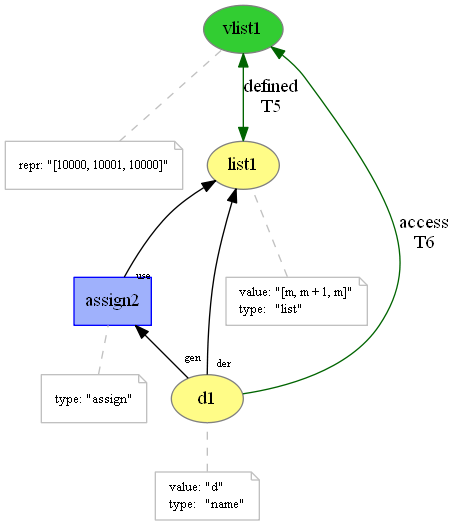

In [6]:
%%provn -o ../mutable_prov/list_assign -e png svg pdf provn
// old entities from previous figure
entity(list1, [value="[m, m + 1, m]", type="list"])
value(vlist1, [repr="[10000, 10001, 10000]"])
defined(list1, vlist1, T5)

// new entities
entity(d1, [value="d", type="name"])
accessed(d1, vlist1, T6)

activity(assign2, [type="assign"])
used(u7; assign2, list1, -)
wasGeneratedBy(g7; d1, assign2, -)
wasDerivedFrom(d1, list1, assign2, g7, u7)

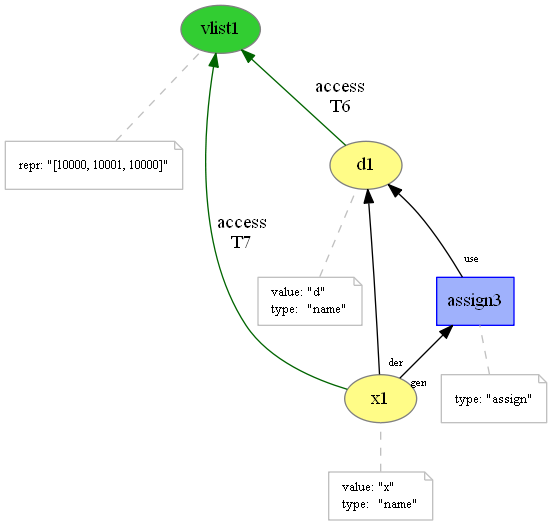

In [7]:
%%provn -o ../mutable_prov/list_assign2 -e png svg pdf provn
// old entities from previous figure
value(vlist1, [repr="[10000, 10001, 10000]"])
entity(d1, [value="d", type="name"])
accessed(d1, vlist1, T6)

// new entities
entity(x1, [value="x", type="name"])
accessed(x1, vlist1, T7)

activity(assign3, [type="assign"])
used(u8; assign3, d1, -)
wasGeneratedBy(g8; x1, assign3, -)
wasDerivedFrom(x1, d1, assign3, g8, u8)

## Function call

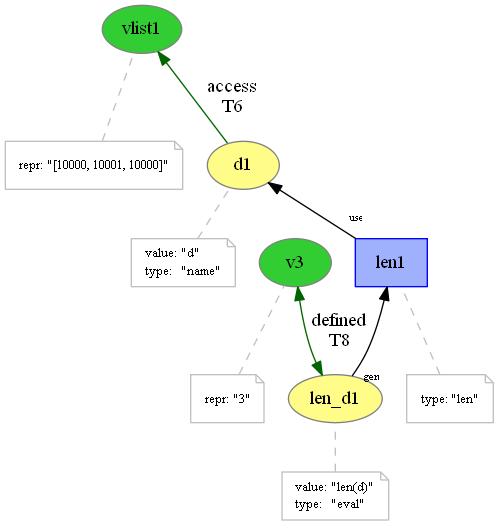

In [8]:
%%provn -o ../mutable_prov/call -e png svg pdf provn
value(vlist1, [repr="[10000, 10001, 10000]"])
entity(d1, [value="d", type="name"])
accessed(d1, vlist1, T6)


entity(len_d1, [value="len(d)", type="eval"])
value(v3, [repr="3"])
defined(len_d1, v3, T8)

activity(len1, [type="len"])
used(len1, d1, -)
wasGeneratedBy(len_d1, len1, -)

## Access to part of structure

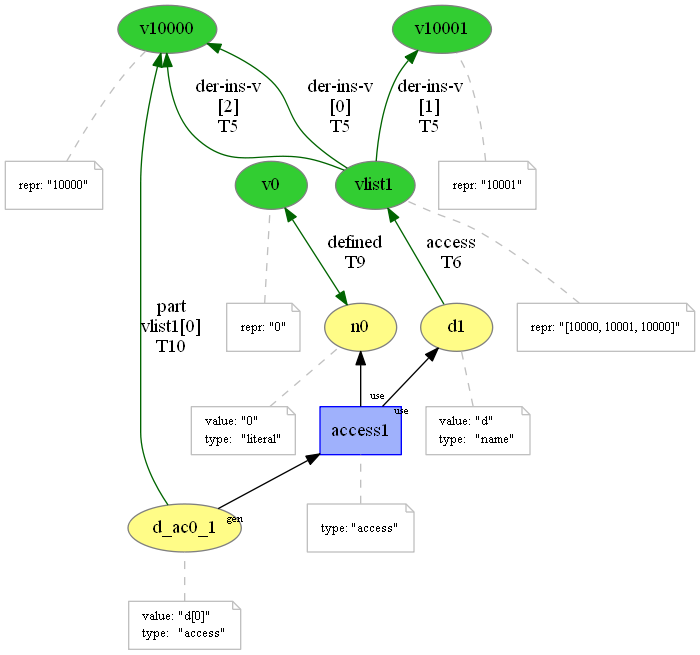

In [9]:
%%provn -o ../mutable_prov/access -e png svg pdf provn
//previous
value(vlist1, [repr="[10000, 10001, 10000]"])
value(v10000, [repr="10000"])
value(v10001, [repr="10001"])
derivedByInsertion(
    -, // list1
    vlist1,
    {("0", v10000), ("1", v10001), ("2", v10000)},
    T5
)
entity(d1, [value="d", type="name"])
accessed(d1, vlist1, T6)


//access
entity(n0, [value="0", type="literal"])
value(v0, [repr="0"])
defined(n0, v0, T9)
entity(d_ac0_1, [value="d[0]", type="access"])
accessedPart(d_ac0_1, vlist1, "0", v10000, T10)


activity(access1, [type="access"])
used(access1, d1, -)
used(access1, n0, -)
wasGeneratedBy(g9; d_ac0_1, access1, -)


## Assignment to part of structure

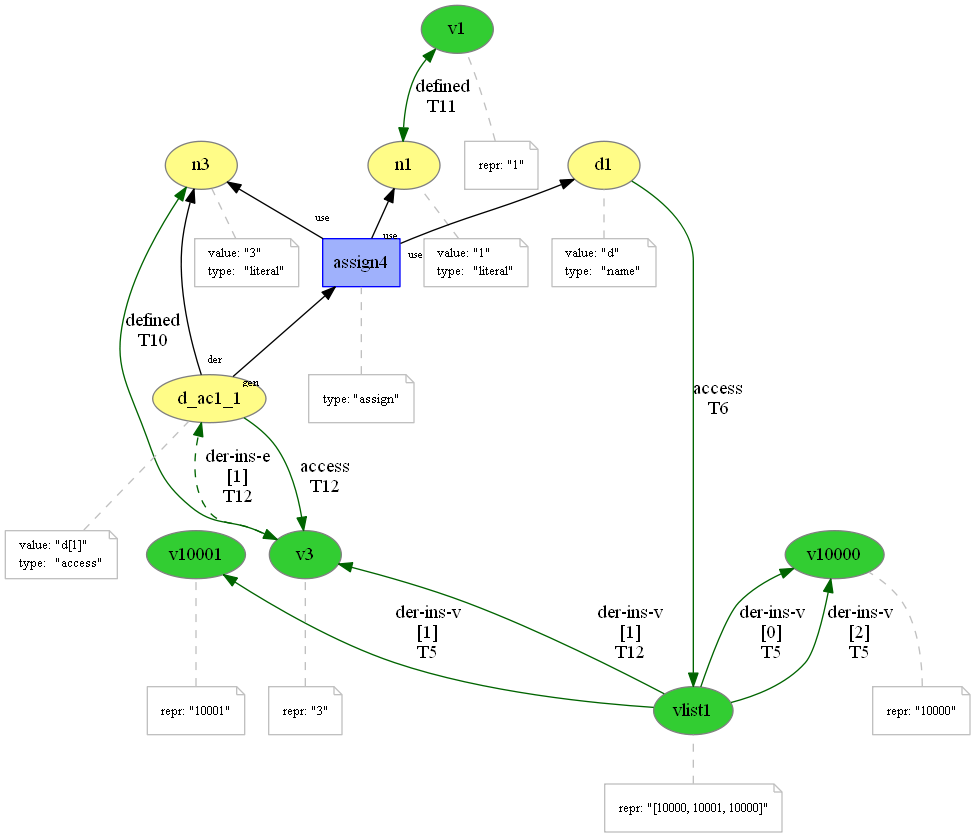

In [10]:
%%provn -o ../mutable_prov/part_assign -e png svg pdf provn
//previous
value(vlist1, [repr="[10000, 10001, 10000]"])
value(v10000, [repr="10000"])
value(v10001, [repr="10001"])
derivedByInsertion(
    -, // list1
    vlist1,
    {("0", v10000), ("1", v10001), ("2", v10000)},
    T5
)
entity(d1, [value="d", type="name"])
accessed(d1, vlist1, T6)


//part assign

entity(n3, [value="3", type="literal"])
value(v3, [repr="3"])
defined(n3, v3, T10)

entity(n1, [value="1", type="literal"])
value(v1, [repr="1"])
defined(n1, v1, T11)

entity(d_ac1_1, [value="d[1]", type="access"])
accessed(d_ac1_1, v3, T12)
derivedByInsertion(d_ac1_1, vlist1, {("1", v3)}, T12)

activity(assign4, [type="assign"])
used(assign4, d1, -)
used(assign4, n1, -)
used(u10; assign4, n3, -)
wasGeneratedBy(g10; d_ac1_1, assign4, -)
wasDerivedFrom(d_ac1_1, n3, assign4, g10, u10)

## Full

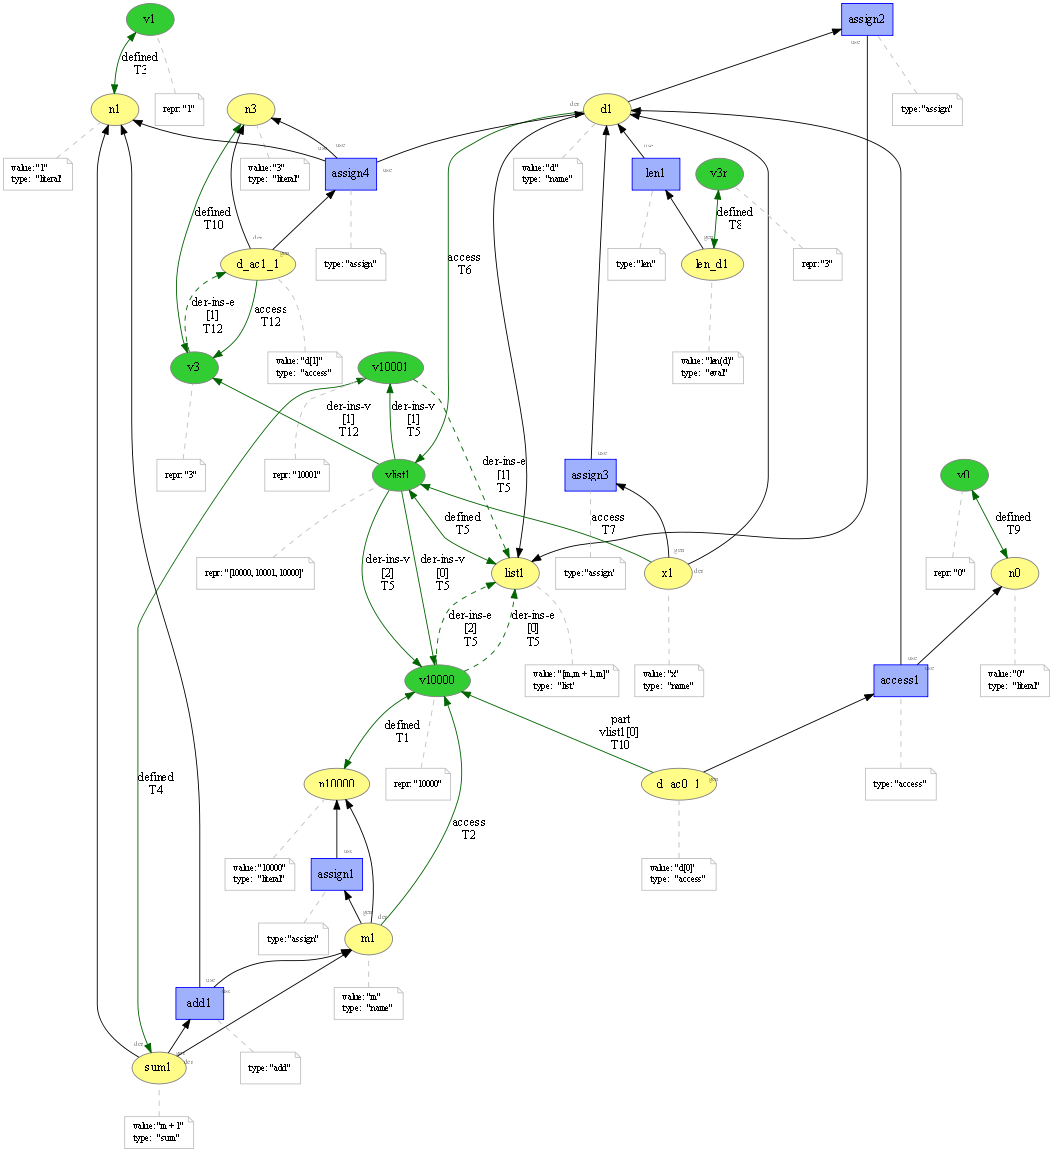

In [15]:
%%provn -o ../mutable_prov/full -e png svg pdf provn
// assignment
entity(n10000, [value="10000", type="literal"])
value(v10000, [repr="10000"])
defined(n10000, v10000, T1)

entity(m1, [value="m", type="name"])
accessed(m1, v10000, T2)

activity(assign1, [type="assign"])
used(u1; assign1, n10000, -)
wasGeneratedBy(g1; m1, assign1, -)
wasDerivedFrom(m1, n10000, assign1, g1, u1)

// operation
entity(n1, [value="1", type="literal"])
value(v1, [repr="1"])
defined(n1, v1, T3)
entity(sum1, [value="m + 1", type="sum"])
value(v10001, [repr="10001"])
defined(sum1, v10001, T4)

activity(add1, [type="add"])
used(u2; add1, m1, -)
used(u3; add1, n1, -)
wasGeneratedBy(g2; sum1, add1, -)
wasDerivedFrom(sum1, m1, add1, g2, u2)
wasDerivedFrom(sum1, n1, add1, g3, u3)

// list def

entity(list1, [value="[m, m + 1, m]", type="list"])
value(vlist1, [repr="[10000, 10001, 10000]"])
derivedByInsertion(
    list1, vlist1,
    {("0", v10000), ("1", v10001), ("2", v10000)},
    T5
)
defined(list1, vlist1, T5)

// list assign
entity(d1, [value="d", type="name"])
accessed(d1, vlist1, T6)

activity(assign2, [type="assign"])
used(u7; assign2, list1, -)
wasGeneratedBy(g7; d1, assign2, -)
wasDerivedFrom(d1, list1, assign2, g7, u7)

// list assign x
entity(x1, [value="x", type="name"])
accessed(x1, vlist1, T7)

activity(assign3, [type="assign"])
used(u8; assign3, d1, -)
wasGeneratedBy(g8; x1, assign3, -)
wasDerivedFrom(x1, d1, assign3, g8, u8)

// call
entity(len_d1, [value="len(d)", type="eval"])
value(v3r, [repr="3"])
defined(len_d1, v3r, T8)

activity(len1, [type="len"])
used(len1, d1, -)
wasGeneratedBy(len_d1, len1, -)

// part access
entity(n0, [value="0", type="literal"])
value(v0, [repr="0"])
defined(n0, v0, T9)
entity(d_ac0_1, [value="d[0]", type="access"])
accessedPart(d_ac0_1, vlist1, "0", v10000, T10)


activity(access1, [type="access"])
used(access1, d1, -)
used(access1, n0, -)
wasGeneratedBy(g9; d_ac0_1, access1, -)

// part assign

entity(n3, [value="3", type="literal"])
value(v3, [repr="3"])
defined(n3, v3, T10)

entity(d_ac1_1, [value="d[1]", type="access"])
accessed(d_ac1_1, v3, T12)
derivedByInsertion(d_ac1_1, vlist1, {("1", v3)}, T12)

activity(assign4, [type="assign"])
used(assign4, d1, -)
used(assign4, n1, -)
used(u10; assign4, n3, -)
wasGeneratedBy(g10; d_ac1_1, assign4, -)
wasDerivedFrom(d_ac1_1, n3, assign4, g10, u10)